In [2]:
# -- coding: utf-8 --
# 1 数据读入
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()  
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = "retina"

titanic_df = pd.read_csv("titanic_data.csv")
titanic_df.head()
# print "origin.len:",len(titanic_df)


origin.len: 891


In [3]:
# 2 数据整理
# 处理原则：尽量将字符型数据转换为可计算的整形数据；去除无法计算的NaN数据（或做数据填充？），避免影响后续计算
# 列Sex做数据转换 male -> 1, female -> 0
titanic_df.replace(to_replace={"Sex":{"male":1, "female":0}}, inplace=True)
# 数据中，Name, Cabin, Embarked, Ticket,未找到合适的转换方法，暂且直接删除这些列，避免影响后续的计算
# print titanic_df.head()
titanic_df.drop(labels=["Name", "Cabin", "Embarked", "Ticket"], inplace=True, axis='columns')
# 去除NaN
titanic_df.dropna(how="any", inplace=True)
# print titanic_df.isnull().sum()
# print "cleaned.len:",len(titanic_df)


relation ship for Survived:
PassengerId    0.029340
Survived       1.000000
Pclass        -0.359653
Age           -0.077221
SibSp         -0.017358
Parch          0.093317
Fare           0.268189
Name: Survived, dtype: float64


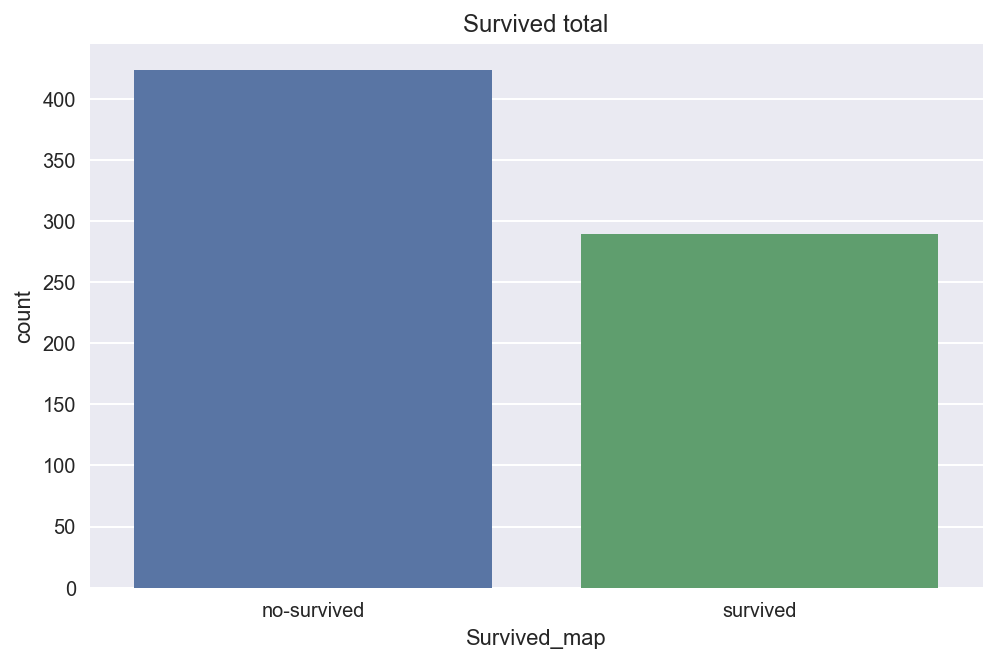

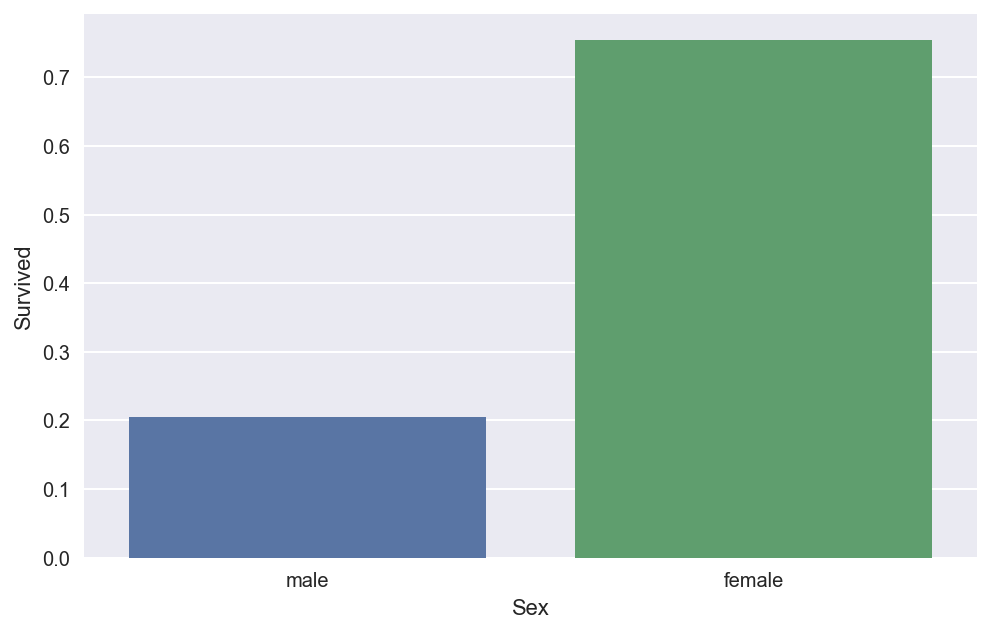

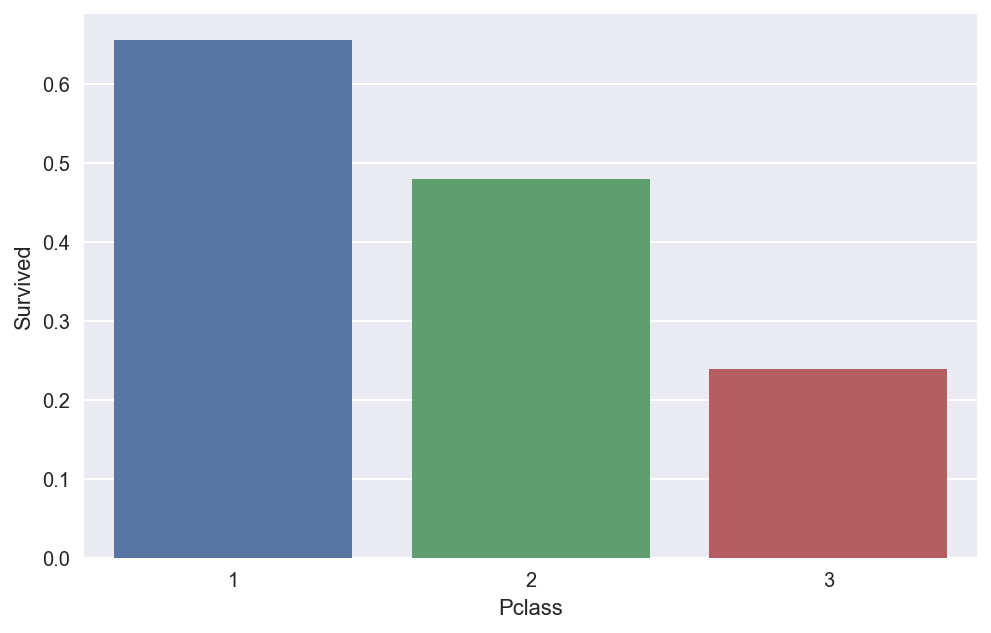

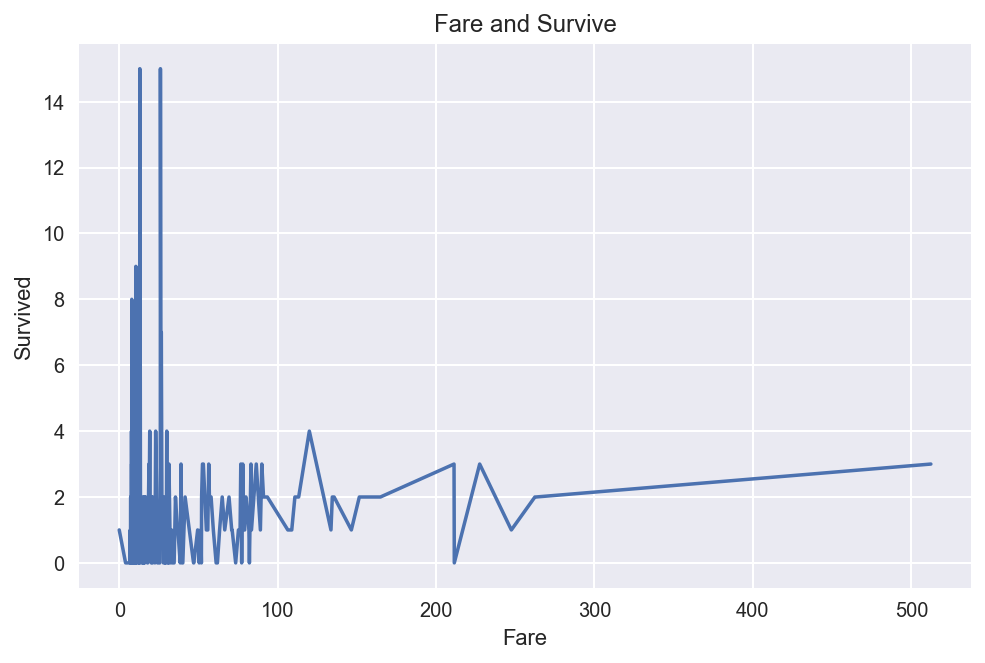

In [28]:
# 3 数据分析
# 看下Survived与各个列的相关系数
# print "total.len:", len(titanic_df)
print "relation ship for Survived:\n", titanic_df.corr().loc["Survived"]
# 由上述结果，可以看出与存活率相关度从高到低依次是Sex，Pclass, Fare。下面分别看下这3项与存活率关系
# 数据清理阶段已经做了数据替换（male->1, female->0）。Survived与Sex负相关，应该是female存活率高于male。下面详细计算之
# 为便于数据显示。先将字段数值转换回去
titanic_df.replace(to_replace={"Sex":{1:"male", 0:"female"}}, inplace=True)
tot_num = len(titanic_df)
survived_group = titanic_df.loc[:,"Survived"].value_counts()
survived_tot = titanic_df["Survived"].sum()


# 总体存活率
plt.figure(figsize = (8,5))
titanic_df['Survived_map'] = titanic_df['Survived'].map({0:"not-survived",1:"survived"})
sns.countplot(x='Survived_map', data=titanic_df)
plt.title('Survived total')

# Survived与Sex关系展示
plt.figure(figsize= (8 ,5))
sns.barplot(data=titanic_df,x="Sex",y="Survived",ci=None)

# Survived与Pclass关系展示
plt.figure(figsize= (8 ,5))
sns.barplot(data=titanic_df,x="Pclass",y="Survived",ci=None)

# Survived与Fare关系展示
fig = plt.figure(figsize= (8 ,5))
var = titanic_df.groupby('Fare').Survived.sum()
ax = fig.add_subplot(111)
ax.set_xlabel('Fare')
ax.set_ylabel('Survived')
ax.set_title('Fare and Survive')
var.plot(kind='line')


plt.show()

# 4 分析总结

由上图可以看出，存活率与性别(Sex)、仓位等级(Pclass)、船票价钱密切相关：
- 女性存活率远高于男性
- 仓位等级越高，存活率越高（仓位值越小，等级越高）
- 总体上看价钱越高，存活概率越高
- 该结论是暂时的，需要进一步改进。